# 🐾 End-to-End Multi-Class Canine Breed Classification

This project involves creating an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub.

## 1. Problem Statement

The objective is to determine the breed of a dog based on an input image.

## 2. Data Source

The dataset utilized is sourced from Kaggle's competition on dog breed identification.

Link to the dataset: [Dog Breed Dataset](https://www.kaggle.com/competitions/dog-breed-identification)

## 3. Performance Evaluation

Submissions are assessed using the Multi-Class Log Loss metric, measuring the dissimilarity between predicted probabilities and observed targets.

For additional details on the evaluation, refer to the [Evaluation Overview](https://www.kaggle.com/competitions/dog-breed-identification/overview) on Kaggle.

## 4. Data Characteristics

Key information about the dataset:

- The data is unstructured, consisting of image data.
- There are 120 distinct breeds of dogs, representing 120 different classes.
- The training set comprises 10,000+ images, and the test set contains an equivalent number.


In [1]:
# unzipping the dataset
# !unzip 'drive/MyDrive/Dog Vision/dog-breed-identification.zip' -d 'drive/MyDrive/Dog Vision/'

The unzip command is used to extract the contents of a ZIP archive. It is not a Python-specific command but a general-purpose command-line utility available in Unix-like operating systems, including Linux and macOS. It is also available on some Windows systems if you have installed additional tools or software like 7-Zip.

`!unzip 'drive/MyDrive/Dog Vision/dog-breed-identification.zip' -d 'drive/MyDrive/Dog Vision/'`

* !: This is a shell escape character used in Jupyter notebooks or IPython to execute shell commands from within the notebook.
* unzip: The command itself.
* 'drive/MyDrive/Dog Vision/dog-breed-identification.zip': This is the path to the ZIP file that you want to unzip.
* -d 'drive/MyDrive/Dog Vision/': This flag specifies the directory where the contents of the ZIP file should be extracted. In this case, it's the 'drive/MyDrive/Dog Vision/' directory.

Commands like unzip are not part of the Python language but are external commands provided by the operating system or third-party tools. Python itself comes with its own package management tools like pip for installing Python packages, and it does not include utilities for handling ZIP files directly in its standard library.

Other common command-line utilities for working with compressed files include:

* tar: Used for creating and manipulating archive files, often used in combination with compression utilities like gzip or bzip2.
* gzip, bzip2, xz: Utilities for compressing and decompressing files.

These commands are typically available in Unix-like environments and may need to be installed or configured separately on Windows.

In Jupyter Notebooks, you can use various utility commands, often referred to as "magic commands," to perform different tasks. Here are some commonly used magic commands:

1. Shell Commands:

* !: Allows you to run shell commands from within a cell. For example:

`!ls`  # List files in the current directory (on Unix-like systems)
`!pwd` # Print the current working directory

2. Magic Commands:

* %: Indicates a line magic command (applies to a single line), and %% indicates a cell magic command (applies to the entire cell).
* %run: Run a Python script as a program.

`%run script.py`

* `%time` and `%timeit`: Measure the execution time of a Python statement or expression.

`%timeit some_function()`

* `%load`: Load code into a cell from an external file.

`%load my_script.py`

3. Cell Magics for Different Languages:

* `%%bash`, `%%python`, etc.: Allows you to run cells using a specific interpreter.

`%%bash`

`echo "Hello, Bash!"`

4. Interactive Widgets:

* %matplotlib inline: Enables inline plotting of matplotlib figures.
* %config InlineBackend.figure_format = 'retina': Improves the quality of inline plots.
* %load_ext autoreload and %autoreload 2: Automatically reload imported modules.

5. Other Utilities:

* %who, %whos: Display variables in the namespace.
* %reset: Resets the namespace by removing all names defined by the user.
* %history: View and search command history.

These are just a few examples. You can explore more magic commands by typing %lsmagic to list all available magics or %magic to access the documentation. Additionally, Jupyter supports IPython features, and you can refer to the IPython documentation for more advanced features and utilities.

In [2]:
# Import Tensorflow & Tensorflow Hub
import tensorflow as tf
import tensorflow_hub as hub

print('TensorFlow version : ', tf.__version__)
print("Tensorflow Hub version : ", hub.__version__)

TensorFlow version :  2.15.0
Tensorflow Hub version :  0.16.0


In [3]:
tf.config.list_physical_devices("GPU")

[]

In [4]:
# Check for GPU availability
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

GPU not available


The command tf.config.list_physical_devices("GPU") is a TensorFlow command used to list all the physical GPU devices available on your system. This is particularly useful when you want to check whether TensorFlow can detect and utilize GPU devices for accelerated computations.


The output of this command will show information about the available GPU devices, such as their names and device types.

Other similar commands and functions in TensorFlow for dealing with hardware and devices include:

1. `tf.config.list_physical_devices()`

Without specifying a device type, this command lists all available physical devices, including both GPUs and CPUs.

    tf.config.list_physical_devices()

2. `tf.config.experimental.list_logical_devices()`

Lists logical devices. Logical devices might include multiple GPUs that are mirrored for data parallelism.

    tf.config.experimental.list_logical_devices()

3. `tf.device()`

Specifies the device on which a particular operation should be executed.

    with tf.device('/GPU:0'):
    TensorFlow operations in this block will run on the first GPU
    
4. `tf.test.is_built_with_cuda()`

Checks whether TensorFlow is built with CUDA support, indicating GPU support.

    tf.test.is_built_with_cuda()

5. `tf.test.gpu_device_name()`

Returns the name of the GPU device (if available).

    tf.test.gpu_device_name()
    
Remember, the availability of certain features or commands might depend on the version of TensorFlow you are using. Always refer to the official TensorFlow documentation for the version you are working with for the most accurate and up-to-date information.

## Step 1 - Getting data ready

1. Convert images to  numerical format (turning images into Tensors)

### 1. Convert images to  numerical format (turning images into Tensors)

In [5]:
# from google.colab import drive

# # Mount Google Drive
# drive.mount('/content/drive')

In [6]:
# Check the labels of the data
import pandas as pd

labels_df = pd.read_csv('drive/MyDrive/Dog Vision/labels.csv')
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
labels_df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


**top Column:**

* id: The most frequently occurring value in the "id" column is "000bec180eb18c7604dcecc8fe0dba07." This is the top value because it appears most frequently.
* breed: The most frequently occurring dog breed in the "breed" column is "scottish_deerhound."

**freq Column:**

* id: The frequency of the top value in the "id" column is 1. This means that the most common "id" value appears only once in the dataset.
* breed: The frequency of the top dog breed in the "breed" column is 126. This indicates that the "scottish_deerhound" breed is the most common, appearing 126 times in the dataset.

<Axes: xlabel='breed'>

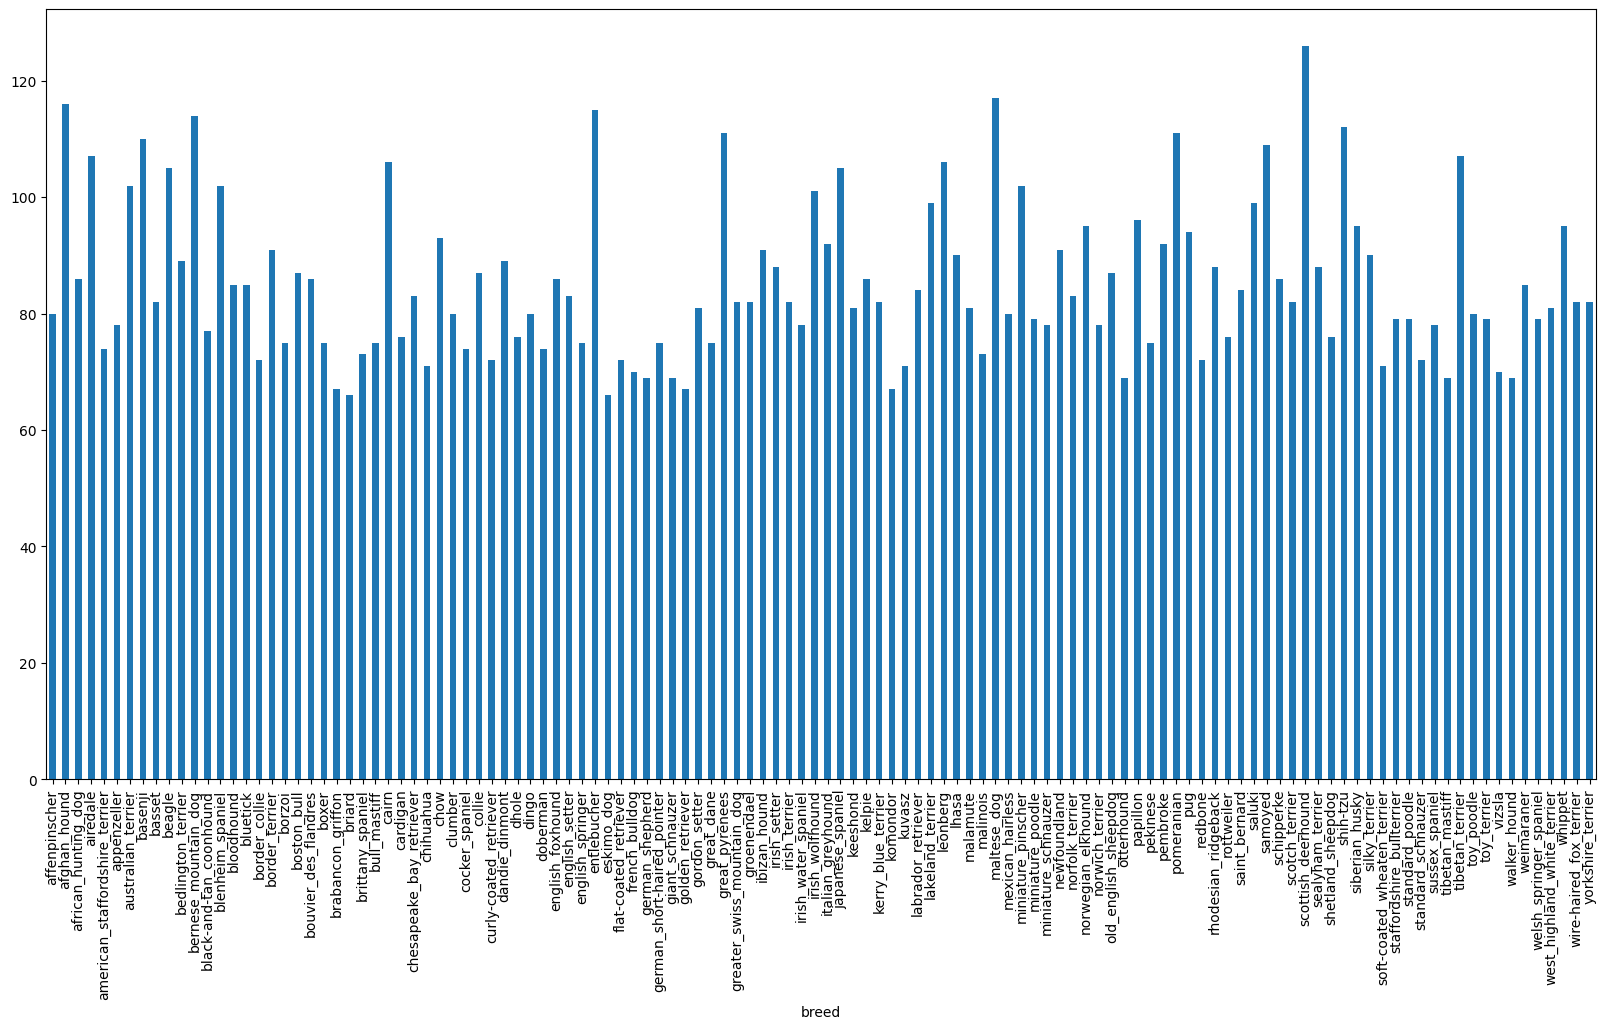

In [8]:
# Plotting the labels.csv to a bar plot
labels_df.groupby('breed')['id'].count().plot.bar(figsize=(20,10)) # plot the chart in alphabatic order

In [9]:
labels_df.value_counts(subset='breed')

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Length: 120, dtype: int64

<Axes: xlabel='breed'>

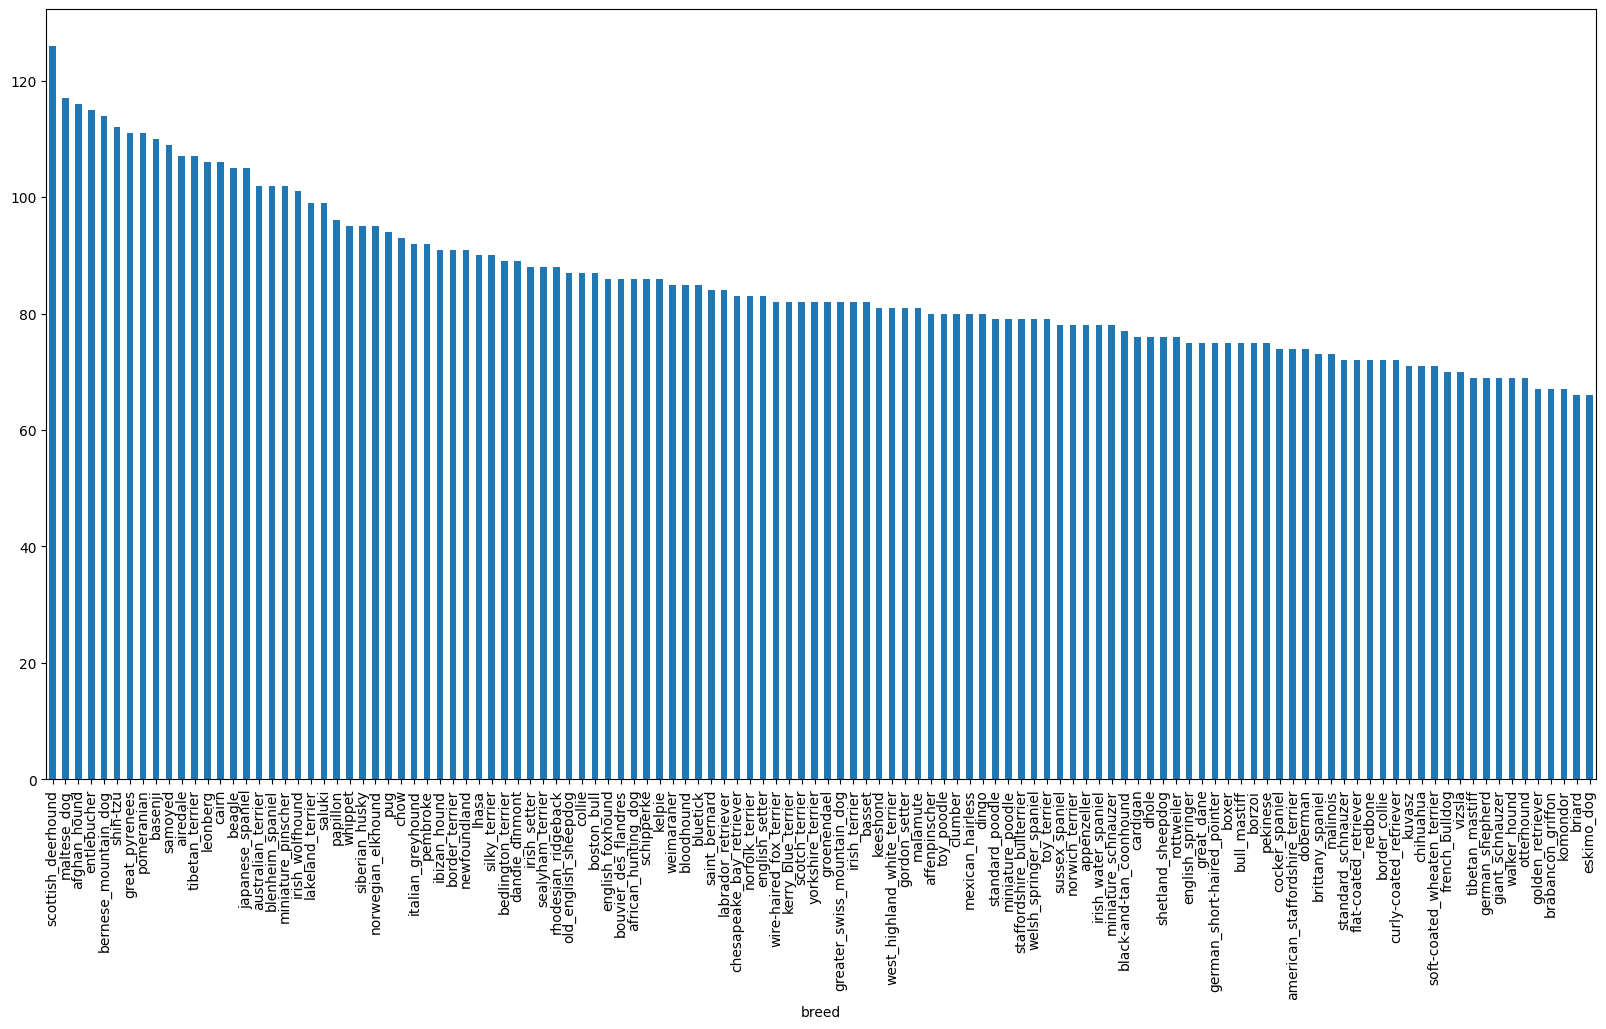

In [10]:
labels_df.value_counts(subset='breed').plot.bar(figsize=(20,10)) # plot the chart in higher value to lower

**pandas.DataFrame.value_counts**

`DataFrame.value_counts(subset=None, normalize=False, sort=True, ascending=False, dropna=True)[source]`

Return a Series containing the frequency of each distinct row in the Dataframe.

**Parameters:**
subsetlabel or list of labels, optional
Columns to use when counting unique combinations.

**normalize** bool, default False
Return proportions rather than frequencies.

**sort** bool, default True
Sort by frequencies when True. Sort by DataFrame column values when False.

**ascending** bool, default False
Sort in ascending order.

**dropna** bool, default True
Don’t include counts of rows that contain NA values.

In [11]:
labels_df.value_counts(subset='breed').median()

82.0

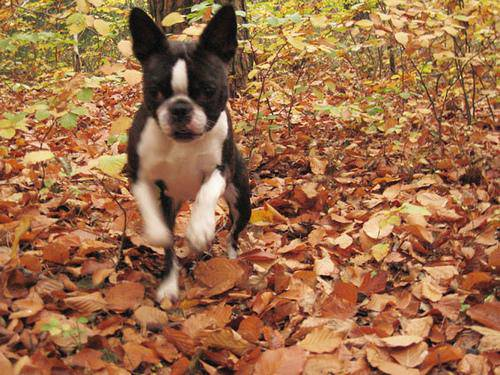

In [12]:
from IPython.display import Image
Image('drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

Alternatively, if you're working with Matplotlib and have the image data as a NumPy array, you can use Matplotlib to display the image:

```python
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Specify the path to your image file
image_path = 'path/to/your/image.jpg'

# Read the image using Matplotlib
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: turn off axis labels
plt.show()
```

In [13]:
# Create pathnames from image ID's
filenames = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv['id']]

# Check the first 10
filenames[:10]

NameError: name 'labels_csv' is not defined